# Dataset Representation


## Imports

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

# Features

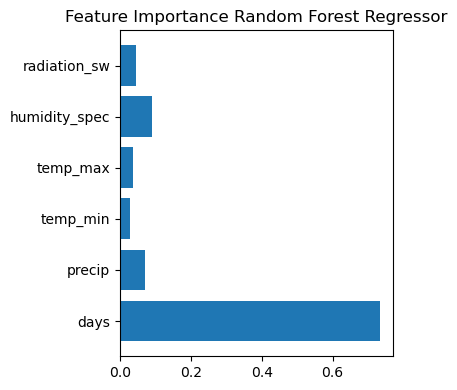

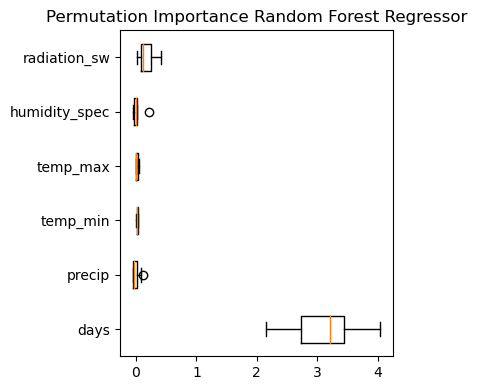

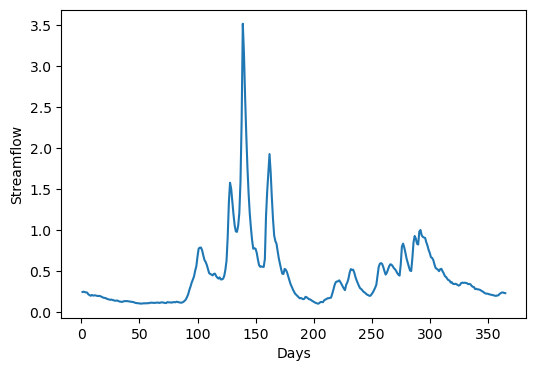

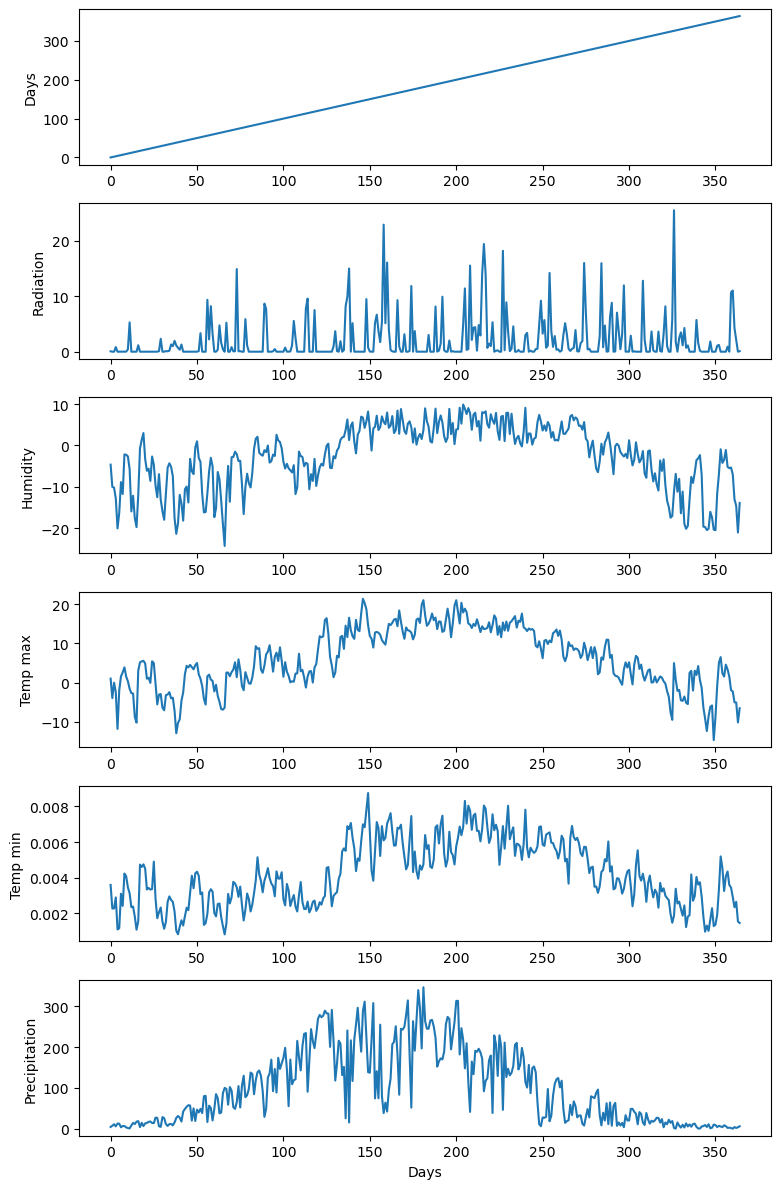

'\nfrom sklearn import tree\ntree_clf = tree.DecisionTreeRegressor()\ntree_clf = tree_clf.fit(X, y)\ntree.plot_tree(tree_clf)\n'

In [11]:
#Reading the datset
def read_csv_and_extract_data(csv_file):
    df = pd.read_csv(csv_file)
    y = df['streamflow'].values
    X_columns = ['days', 'precip', 'temp_min', 'temp_max', 'humidity_spec', 'radiation_sw']
    X = df[X_columns].values
    feature_names = X_columns
    return X, y, feature_names

#Splitting into test and train
X, y, feature_names = read_csv_and_extract_data('Project3_data.csv')
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

# Scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Illustration of dataset.
reg = RandomForestRegressor(random_state=1)
#reg = GradientBoostingRegressor(random_state=1)
reg.fit(X_train, y_train)

# Feature Importance (MDI)
feature_importance = reg.feature_importances_
pos = np.arange(feature_importance.shape[0]) + 0.5
fig = plt.figure(figsize=(7, 4))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance, align="center")
plt.yticks(pos, np.array(feature_names))
plt.title("Feature Importance Random Forest Regressor")
fig.tight_layout()
plt.savefig('Importance_RFR.pdf', format='pdf', bbox_inches="tight")
plt.show()

# Permutation Importance (test set)
result = permutation_importance(reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
fig = plt.figure(figsize=(7, 4))
plt.subplot(1, 2, 2)
plt.boxplot(result.importances.T, vert=False, labels=np.array(feature_names))
plt.title("Permutation Importance Random Forest Regressor")
fig.tight_layout()
plt.savefig('Permutation_RFR.pdf', format='pdf', bbox_inches="tight")
plt.show()   

fig = plt.figure(figsize=(6, 4))
days = np.linspace(1,365,365)
plt.plot(days,y)
plt.xlabel('Days')
plt.ylabel('Streamflow')
plt.savefig('Data.pdf', format='pdf', bbox_inches="tight")
plt.show()

# Plot columns
column_names = ['Days','Radiation', 'Humidity', 'Temp max', 'Temp min', 'Precipitation']
num_columns = X.shape[1]
fig, axes = plt.subplots(nrows=num_columns, figsize=(8, 2*num_columns))
for i in range(num_columns):
    axes[i].plot(X[:, i], label=f'Column {i+1}')
    axes[i].set_ylabel(column_names[i])
plt.xlabel('Days')
plt.tight_layout()
plt.savefig('Data_appendix.pdf', format='pdf', bbox_inches="tight")
plt.show()

'''
from sklearn import tree
tree_clf = tree.DecisionTreeRegressor()
tree_clf = tree_clf.fit(X, y)
tree.plot_tree(tree_clf)
'''

## Correlation Matrix

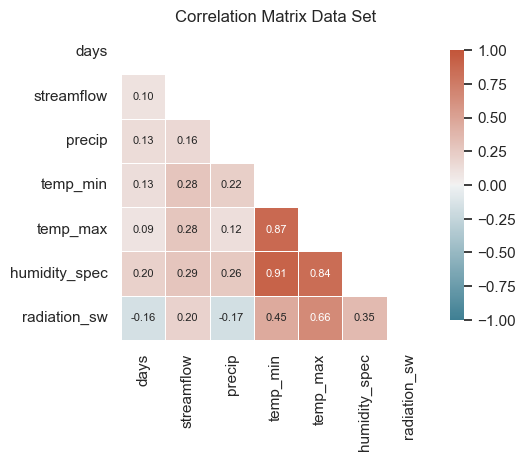

In [12]:
data = pd.read_csv('Project3_data.csv')
df = pd.DataFrame(data, columns=data.columns)
df = data.drop(columns=['date'])
corr_matrix = df.corr()
np.fill_diagonal(corr_matrix.values, 1)
fontsize = 12
annot_kws = {"size": 8}
sns.set(style="white")
plt.figure(figsize= (5, 5))
plt.title('Correlation Matrix Data Set', fontsize=fontsize)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.7}, annot=True, fmt=".2f", annot_kws=annot_kws)
plt.savefig('correlation.pdf', format='pdf', bbox_inches="tight")
plt.show()